# Gene Boday Coverage Plots

In [1]:
!date

Mon Oct 28 04:00:38 PDT 2024


In [2]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3/envs/py310


In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import seaborn.objects as so

In [5]:
input_dir='/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/'

In [6]:
df_5prime = pd.read_csv(input_dir+'5prime_housekeeping_500.geneBodyCoverage.txt.geneBodyCoverage.txt',
                        sep='\t',index_col=0
                       ).T.reset_index(names=['percentile','merged_5prime'])

df_5prime = df_5prime.rename_axis(None, axis=1)

FileNotFoundError: [Errno 2] No such file or directory: '/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/coverage_plots/5prime_housekeeping_500.geneBodyCoverage.txt.geneBodyCoverage.txt'

<Axes: xlabel='percentile', ylabel='merged_5prime'>

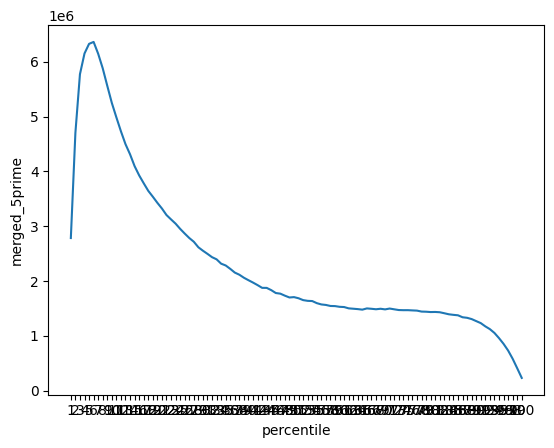

In [8]:
sns.lineplot(data=df_5prime,
            x='percentile',
            y='merged_5prime')

In [7]:
#normalize coverage
df = df_5prime.drop('percentile', axis=1)
cov_5prime = (df-df.min())/(df.max()-df.min())
cov_5prime['percentile'] = df_5prime['percentile']

cov_5prime = cov_5prime.rename(columns={'count':'5prime'})

In [8]:
df_internal = pd.read_csv(input_dir+'internal_housekeeping_500.geneBodyCoverage.txt.geneBodyCoverage.txt',
                        sep='\t',index_col=0
                       ).T.reset_index(names=['percentile','merged_internal'])

df_internal = df_internal.rename_axis(None, axis=1)

In [9]:
#normalize coverage
df = df_internal.drop('percentile', axis=1)
cov_internal = (df-df.min())/(df.max()-df.min())
cov_internal['percentile'] = df_internal['percentile']

cov_internal = cov_internal.rename(columns={'count':'internal'})

In [10]:
cov_internal.head()

,merged_internal,percentile
0,0.000000,1
1,0.079621,2
2,0.165539,3
3,0.254735,4
4,0.332892,5


In [11]:
df_3prime = pd.read_csv(input_dir+'3prime_housekeeping_500.geneBodyCoverage.txt.geneBodyCoverage.txt',
                        sep='\t',index_col=0
                       ).T.reset_index(names=['percentile','merged_3prime'])

df_3prime = df_3prime.rename_axis(None, axis=1)

In [12]:
#normalize coverage
df = df_3prime.drop('percentile', axis=1)
cov_3prime = (df-df.min())/(df.max()-df.min())
cov_3prime['percentile'] = df_3prime['percentile']

cov_3prime = cov_3prime.rename(columns={'count':'3prime'})

In [13]:
cov = pd.merge(cov_5prime, cov_internal, on='percentile')

cov = pd.merge(cov, cov_3prime, on='percentile')



In [14]:
cov = cov.melt(id_vars=['percentile'],
        var_name='Library', value_name='Coverage')

In [15]:
#cov['color'] = cov['Library'].map(color_mode)

In [23]:
cov

,percentile,Library,Coverage
0,1,merged_5prime,0.416302
1,2,merged_5prime,0.729304
2,3,merged_5prime,0.903888
3,4,merged_5prime,0.965607
4,5,merged_5prime,0.994227
...,...,...,...
295,96,merged_3prime,0.902538
296,97,merged_3prime,0.957513
297,98,merged_3prime,1.000000
298,99,merged_3prime,0.994045


In [16]:
cov['percentile'] = cov['percentile'].astype(int)

p = so.Plot(cov, "percentile", "Coverage", color="Library",
           )

/c4/home/derek/miniconda3/envs/pygenometracks/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/c4/home/derek/miniconda3/envs/pygenometracks/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]


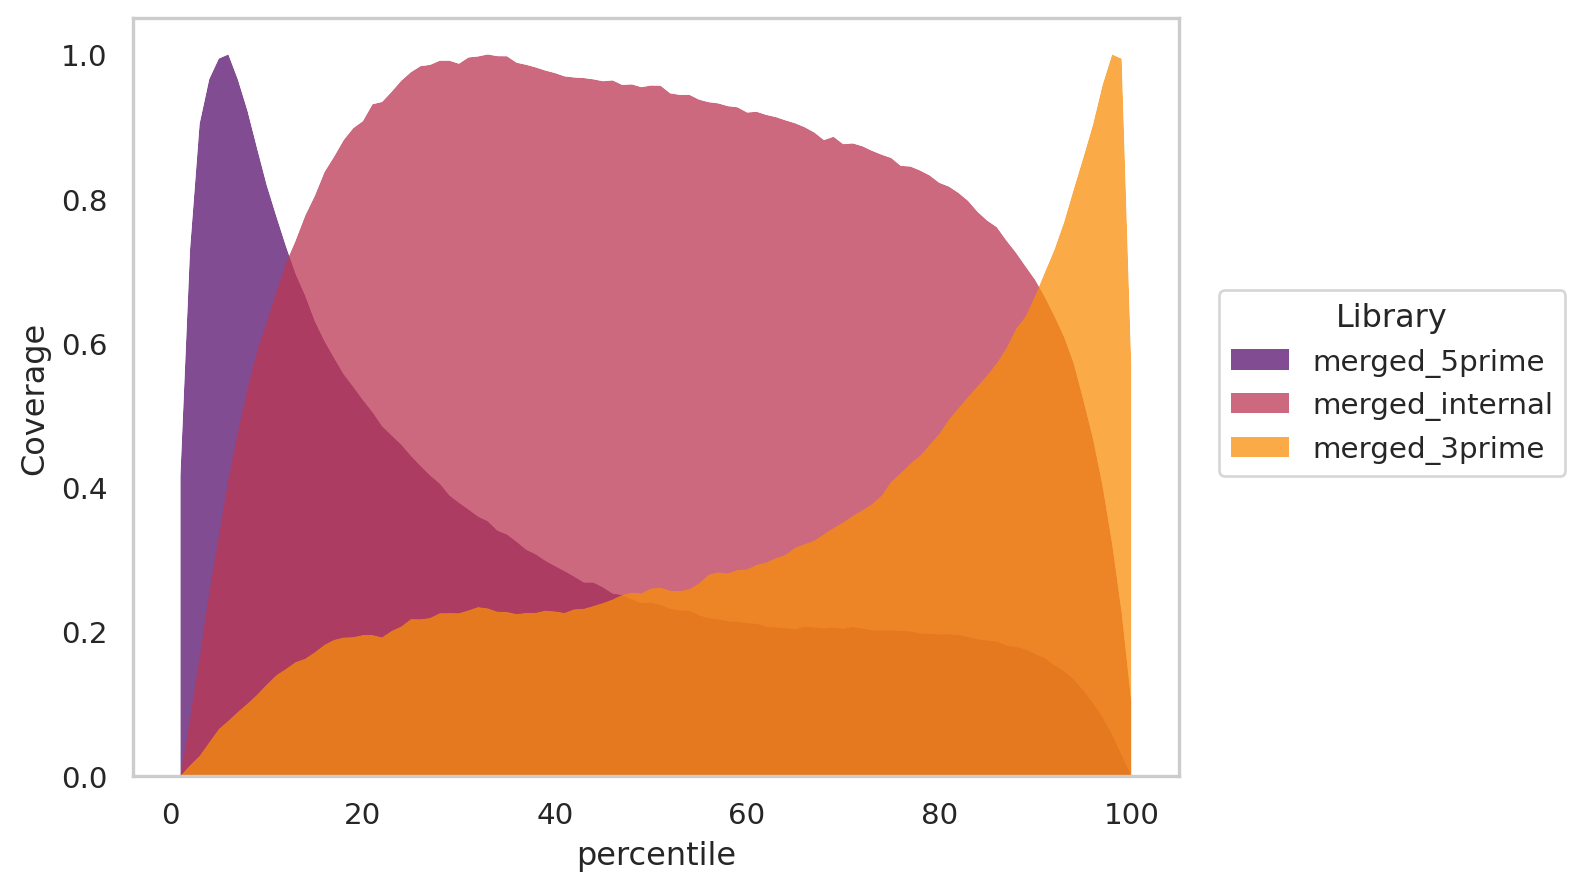

In [17]:
from seaborn import axes_style

p.add(so.Line(linewidth=0,
             )).add(
    so.Area(alpha=.75,edgewidth=0
           )).theme(
    axes_style({**axes_style("whitegrid"), 'axes.grid': False,})).scale(
    color="inferno",
    x=so.Continuous().tick(upto=6)
    )#.save('./plots/Coverage.pdf')



/c4/home/derek/miniconda3/envs/pygenometracks/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/c4/home/derek/miniconda3/envs/pygenometracks/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]


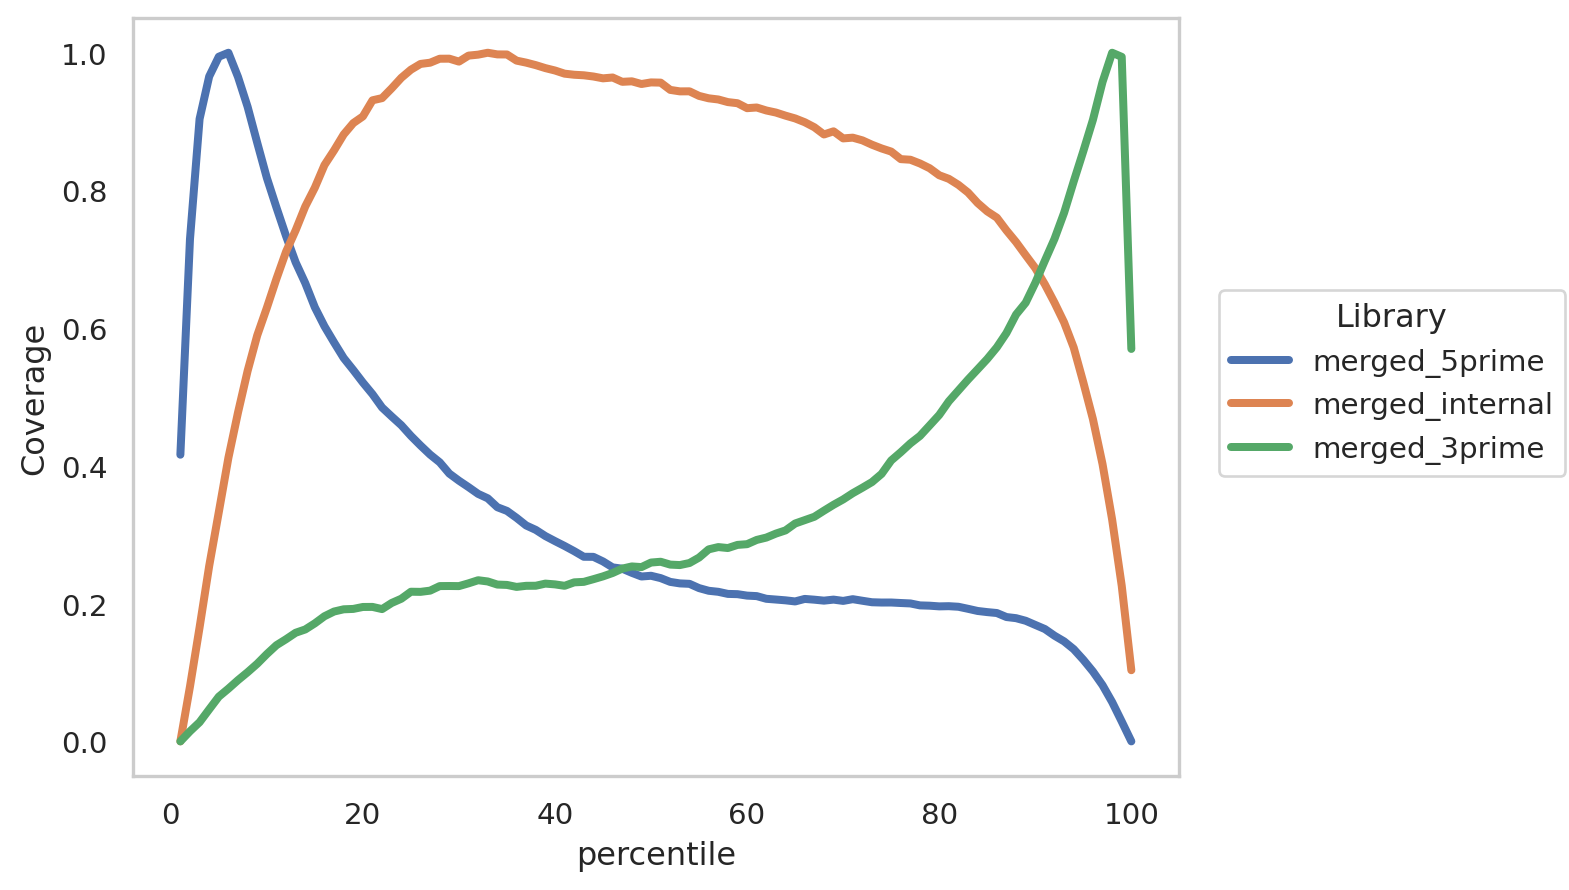

In [18]:
from seaborn import axes_style

p.add(so.Line(linewidth=3,
             )).theme(
    axes_style({**axes_style("whitegrid"), 'axes.grid': False,}))

#.save('./plots/Coverage.pdf')




# p.add(so.Line(linewidth=0,
#              )).theme(
#     axes_style({**axes_style("whitegrid"), 'axes.grid': False,})).scale(
#     color="flare",
#     x=so.Continuous().tick(upto=6)
#     ).save('./plots/Coverage.pdf')

In [19]:
p = so.Plot(cov, "percentile", "Coverage", color="Library",
           ).facet(row="Library")

/c4/home/derek/miniconda3/envs/pygenometracks/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/c4/home/derek/miniconda3/envs/pygenometracks/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/c4/home/derek/miniconda3/envs/pygenometracks/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/c4/home/derek/miniconda3/envs/pygenometracks/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] =

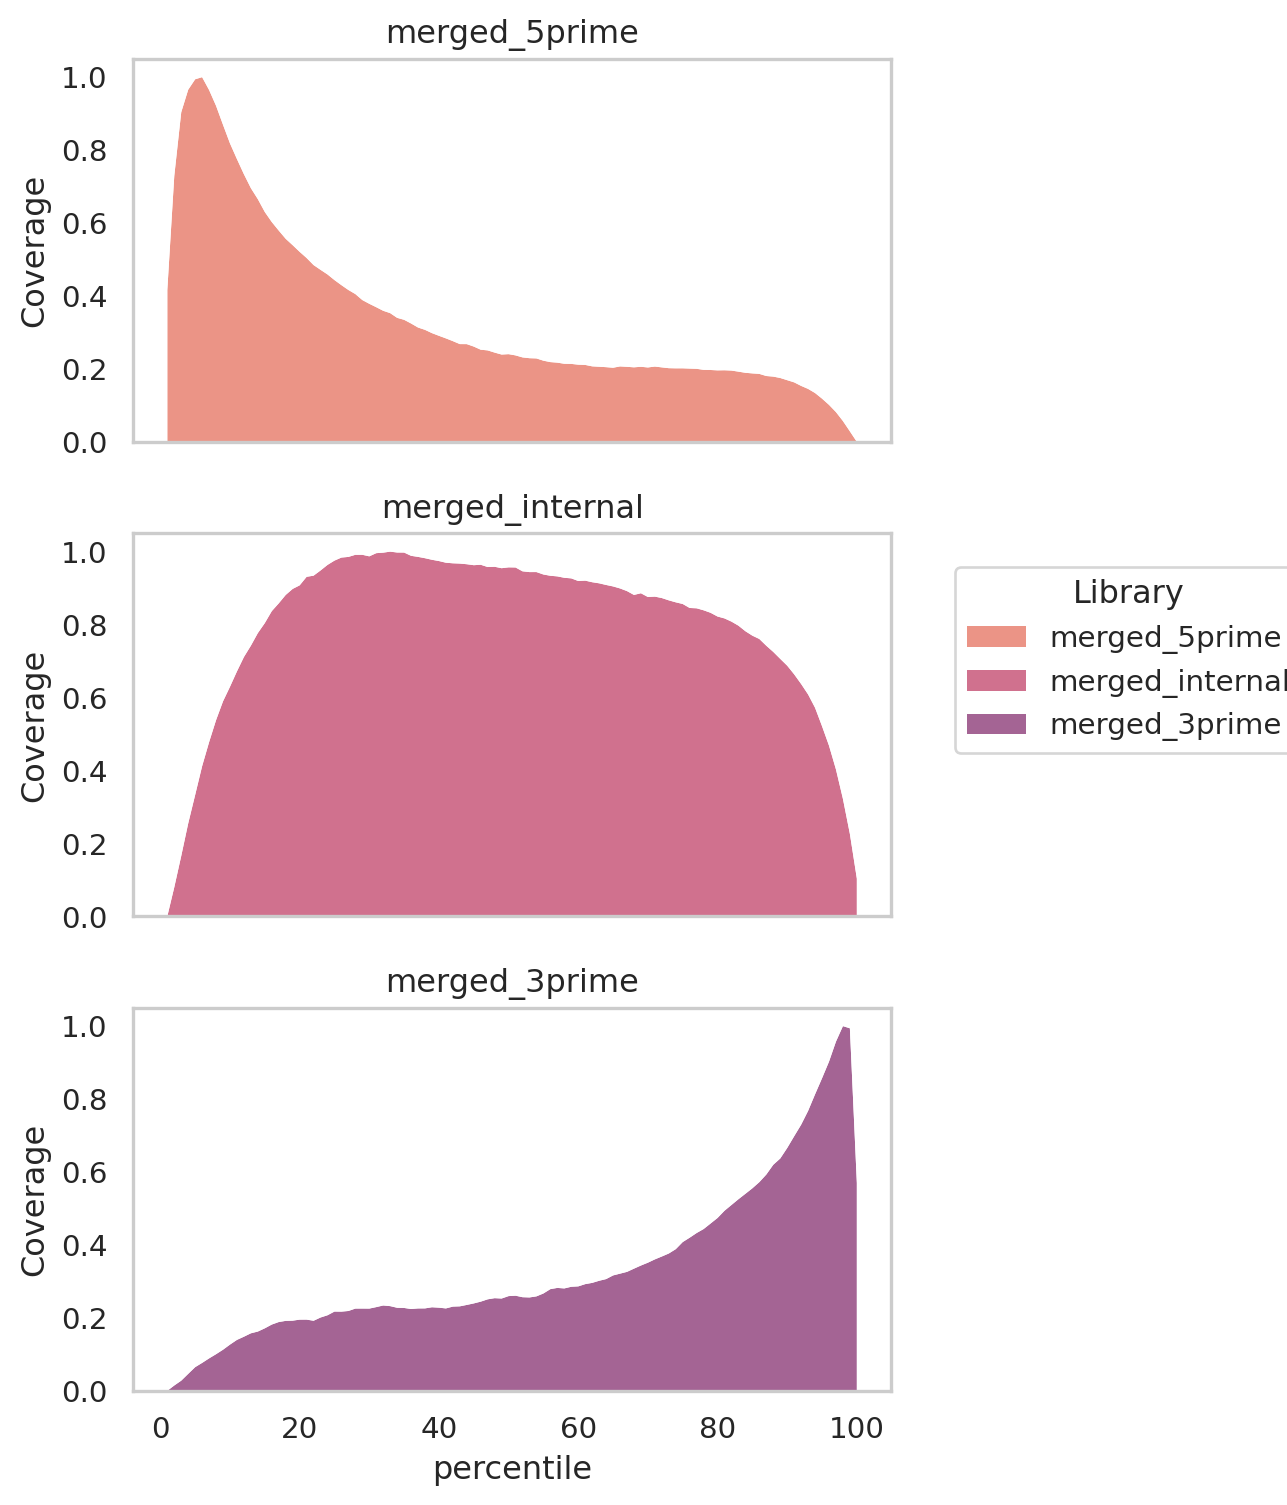

In [20]:
from seaborn import axes_style

p.add(so.Line(linewidth=0,
             )).add(
    so.Area(alpha=.75,edgewidth=0
           )).theme(
    axes_style({**axes_style("whitegrid"),'axes.grid': False,})).scale(color="flare").layout(size=(5,8)).save('./plots/Coverage.pdf')



## coverage plots of significant splicing events

In [29]:
sig_diff_spl_intron_groups = pd.read_csv("/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/diff_intron_groups.csv",index_col=0)
sig_diff_spl_introns = pd.read_csv("/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/diff_introns.csv",index_col=0)



In [22]:
gtf_path = '/c4/home/derek/data1/derek/reference/human_hp3_reference/genes/genes.gtf'

gtf = pd.read_csv(
    gtf_path,
    sep="\t",
    header=None,
    comment="#",
    names=[
        "chromosome",
        "source",
        "feature",
        "start",
        "end",
        "score",
        "strand",
        "frame",
        "attribute",
    ],
)
gtf = gtf[gtf.feature == "gene"]
gtf["gene_id"] = gtf.attribute.str.extract(r'gene_id "([^;]*)";')

